<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Support%20Vector%20Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Support Vector Machine
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Dataset**
- `Dry_Beans_Dataset` - download on [Kaggle](https://www.kaggle.com/impapan/dry-beans-dataset)

# Importing Libraries

In [51]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Reading Dataset

In [52]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Dry_Bean_Dataset.csv'

data = pd.read_csv(path)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [53]:
data.duplicated().sum()

68

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [56]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [57]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


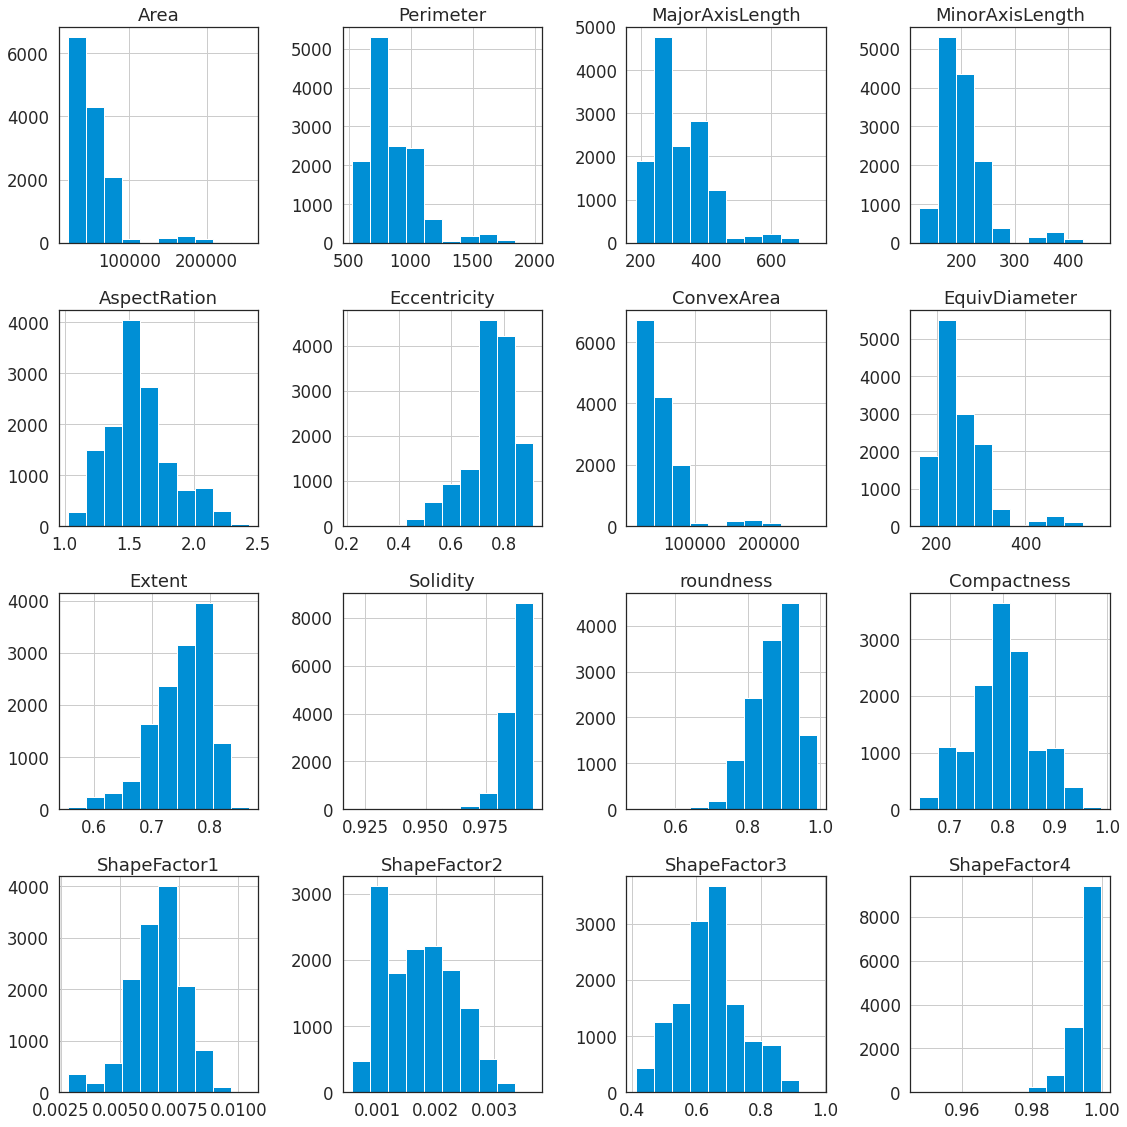

In [58]:
data.hist(figsize=(16,16))

plt.tight_layout()
plt.show()

# Data Preprocessing

## Train - Test Split

In [59]:
data_X = data.drop('Class', axis=1)
data_y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

## Label Encoding

In [60]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [61]:
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [62]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

for i in data.columns[:-1]:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

# SVM - OVR

## Building Model

In [63]:
model = SVC(decision_function_shape='ovr')
model.fit(X_train_scale, y_train_encode)

SVC()

In [64]:
y_pred = model.predict(X_test_scale)

## Model Evaluation

### Classification Report

In [65]:
print(classification_report(y_test_encode, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.957     0.904     0.930       397
           1      1.000     1.000     1.000       156
           2      0.930     0.947     0.938       489
           3      0.920     0.935     0.928      1064
           4      0.960     0.948     0.954       558
           5      0.961     0.944     0.953       608
           6      0.871     0.886     0.878       791

    accuracy                          0.930      4063
   macro avg      0.943     0.938     0.940      4063
weighted avg      0.930     0.930     0.930      4063



In [66]:
print('Accuracy\t: ', round(accuracy_score(y_test_encode, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_encode, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test_encode, y_pred, average='macro'),3))

Accuracy	:  0.93
Precision	:  0.943
Recall		:  0.938


### Confusion Matrix

In [67]:
label_name = dict(zip([0,1,2,3,4,5,6], le.classes_))

cm = confusion_matrix(y_test_encode, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=label_name, index=label_name, inplace=True)
df_cm

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,359,0,30,0,1,4,3
BOMBAY,0,156,0,0,0,0,0
CALI,6,0,463,0,12,2,6
DERMASON,0,0,0,995,0,12,57
HOROZ,1,0,5,4,529,0,19
SEKER,7,0,0,7,1,574,19
SIRA,2,0,0,75,8,5,701


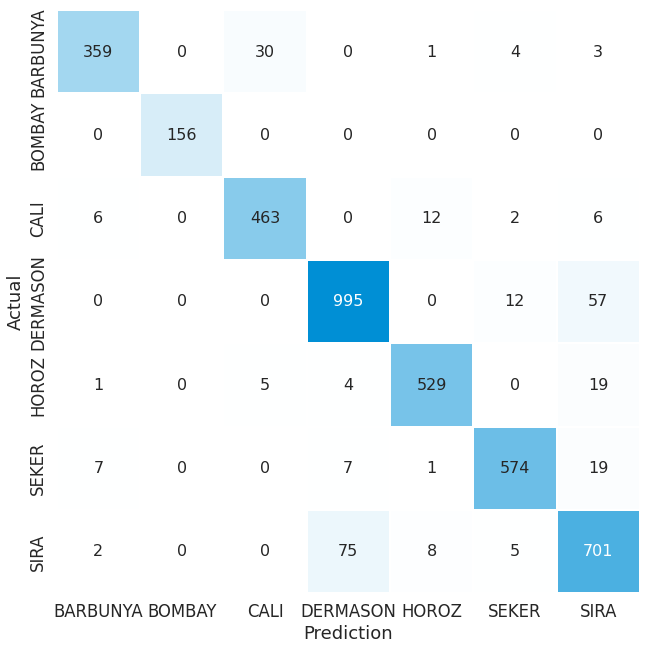

In [68]:
cvals = [0, 1] # color locations
colors = [(1,1,1), (0/255, 143/255, 213/255)] # color values
mapping = list(zip(cvals, colors))
cmap = LinearSegmentedColormap.from_list("", mapping)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cm, fmt='.0f', cbar=False,
            cmap=cmap, linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

# SVM - OVO

## Building Model

In [69]:
model = SVC(decision_function_shape='ovo')
model.fit(X_train_scale, y_train_encode)

SVC(decision_function_shape='ovo')

In [70]:
y_pred = model.predict(X_test_scale)

## Model Evaluation

### Classification Report

In [71]:
print(classification_report(y_test_encode, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.957     0.904     0.930       397
           1      1.000     1.000     1.000       156
           2      0.930     0.947     0.938       489
           3      0.920     0.935     0.928      1064
           4      0.960     0.948     0.954       558
           5      0.961     0.944     0.953       608
           6      0.871     0.886     0.878       791

    accuracy                          0.930      4063
   macro avg      0.943     0.938     0.940      4063
weighted avg      0.930     0.930     0.930      4063



In [72]:
print('Accuracy\t: ', round(accuracy_score(y_test_encode, y_pred),3))
print('Precision\t: ', round(precision_score(y_test_encode, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test_encode, y_pred, average='macro'),3))

Accuracy	:  0.93
Precision	:  0.943
Recall		:  0.938


### Confusion Matrix

In [73]:
label_name = dict(zip([0,1,2,3,4,5,6], le.classes_))

cm = confusion_matrix(y_test_encode, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns=label_name, index=label_name, inplace=True)
df_cm

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,359,0,30,0,1,4,3
BOMBAY,0,156,0,0,0,0,0
CALI,6,0,463,0,12,2,6
DERMASON,0,0,0,995,0,12,57
HOROZ,1,0,5,4,529,0,19
SEKER,7,0,0,7,1,574,19
SIRA,2,0,0,75,8,5,701


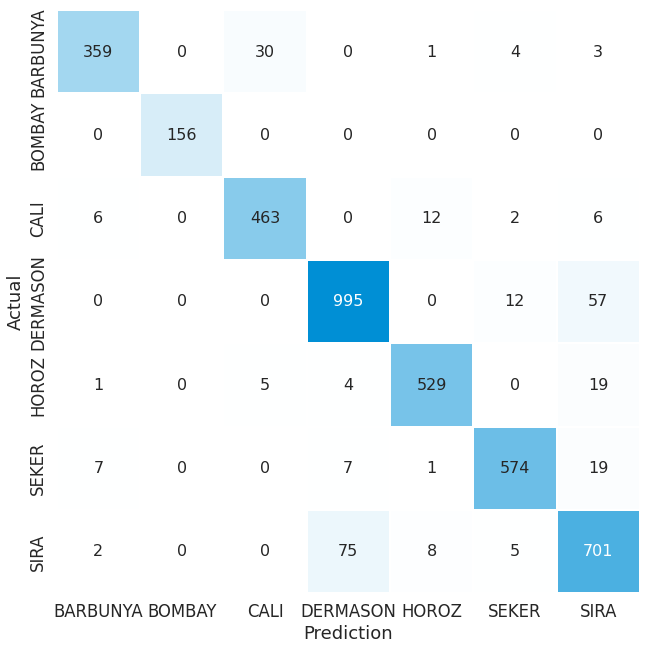

In [74]:
cvals = [0, 1] # color locations
colors = [(1,1,1), (0/255, 143/255, 213/255)] # color values
mapping = list(zip(cvals, colors))
cmap = LinearSegmentedColormap.from_list("", mapping)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cm, fmt='.0f', cbar=False,
            cmap=cmap, linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()